<div style="display:fill;
           background-color:#F2E5E5;
           letter-spacing:0.5px;border-bottom: 2px solid black;">
<img src="https://raw.githubusercontent.com/IqmanS/Machine-Learning-Notebooks/main/enefit/enefit-banner.jpg">
<H2 style="padding: 20px; color:black; font-weight:600; font-family: 'Garamond', 'Lucida Sans', sans-serif; text-align: center; font-size: 38px;">📊 Interactive Time-Series Analysis using Plotly </H2>
</div>


In [264]:
import numpy as np
import pandas as pd
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

<div>
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 36px;">
    I. Consumption Amount Analysis
    </h1>
</div>
<hr>

In [265]:
enefit = pd.read_csv("/kaggle/input/predict-energy-behavior-of-prosumers/train.csv")
enefit["datetime"] = pd.to_datetime(enefit["datetime"])

consumption = enefit[enefit["is_consumption"]==1]
monthlyCons = consumption.groupby(pd.Grouper(key="datetime", freq='M')).mean() 
weeklyCons = consumption.groupby(pd.Grouper(key="datetime", freq='W')).mean() 
dailyCons = consumption.groupby(pd.Grouper(key="datetime", freq='D')).mean() 
meanConsumption = consumption.target.mean()

production = enefit[enefit["is_consumption"]==0]
monthlyProd = production.groupby(pd.Grouper(key="datetime", freq='M')).mean() 
weeklyProd = production.groupby(pd.Grouper(key="datetime", freq='W')).mean() 
dailyProd = production.groupby(pd.Grouper(key="datetime", freq='D')).mean() 
meanProduction = production.target.mean()

<div class="alert alert-block alert-info">
<h3 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color:#164863; font-weight: bold; font-size: 24px;">   About 'train.csv':  </h3>
<b>county:</b> An ID code for the county.<br>
<b>is_business:</b> Boolean for whether or not the prosumer is a business.<br>
<b>product_type:</b> ID code with the following mapping of codes to contract types.<br>
<b>target:</b> The consumption/production amount for the relevant segment for the hour.<br>
<b>is_consumption:</b> Boolean for whether or not this row's target is consumption or production.<br>
<b>datetime:</b> The Estonian time in EET (UTC+2) / EEST (UTC+3).<br>
</div>
    


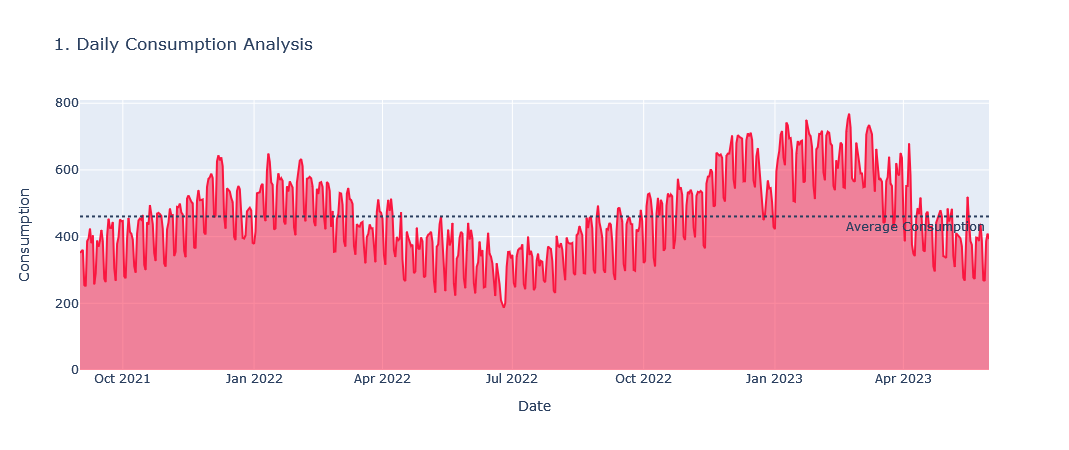

In [266]:
fig = px.area(dailyCons,x=dailyCons.index,y="target",title='1. Daily Consumption Analysis')
fig.add_hline(y=meanConsumption, line_dash="dot", annotation_text="Average Consumption", annotation_position="bottom right")
fig.update_traces(line_color='#FA163F')
fig.update_layout(xaxis_title="Date", yaxis_title="Consumption",legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()

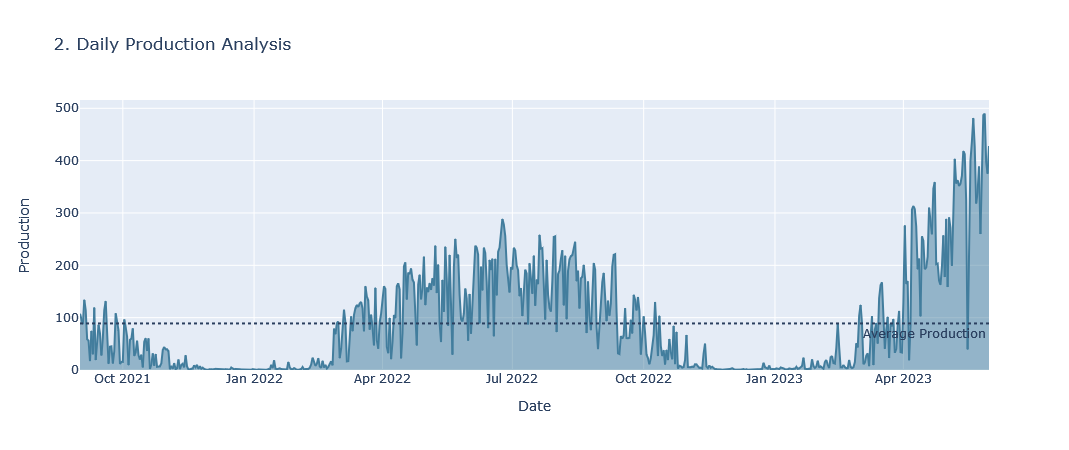

In [267]:
fig = px.area(dailyProd,x=dailyProd.index,y="target",title='2. Daily Production Analysis')
fig.add_hline(y=meanProduction, line_dash="dot", annotation_text="Average Production", annotation_position="bottom right")
fig.update_traces(line_color='#427D9D')
fig.update_layout(xaxis_title="Date", yaxis_title="Production",legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()

<div>
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 36px;">
    II. Gas Price Analysis
    </h1>
</div>
<hr>

In [268]:
gas = pd.read_csv("/kaggle/input/predict-energy-behavior-of-prosumers/gas_prices.csv")
gas.drop(["origin_date"],inplace=True,axis=1)
gas["forecast_date"] = pd.to_datetime(gas["forecast_date"])

monthly = gas.groupby(pd.Grouper(key="forecast_date", freq='M')).mean() 
weekly = gas.groupby(pd.Grouper(key="forecast_date", freq='W')).mean() 
daily = gas.groupby(pd.Grouper(key="forecast_date", freq='D')).mean() 
meanGasLow = gas.lowest_price_per_mwh.mean()
meanGasHigh = gas.highest_price_per_mwh.mean()

<div class="alert alert-block alert-info">
<h3 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color:#164863;  font-weight: bold; font-size: 24px;">   About 'gas_price.csv':  </h3>
<b>origin_date:</b> The date when the day-ahead prices became available.<br>
<b>forecast_date:</b> The date when the forecast prices should be relevant.<br>
<b>lowest_price_per_mwh:</b> The lowest price of natural gas that on the day ahead market that trading day.<br>
<b>highest_price_per_mwh:</b> The highest price of natural gas that on the day ahead market that trading day.<br>
&nbsp;&nbsp;&nbsp;&nbsp; <i>(Gas Prices are in Euros per megawatt hour equivalent.)<i><br>
</div>

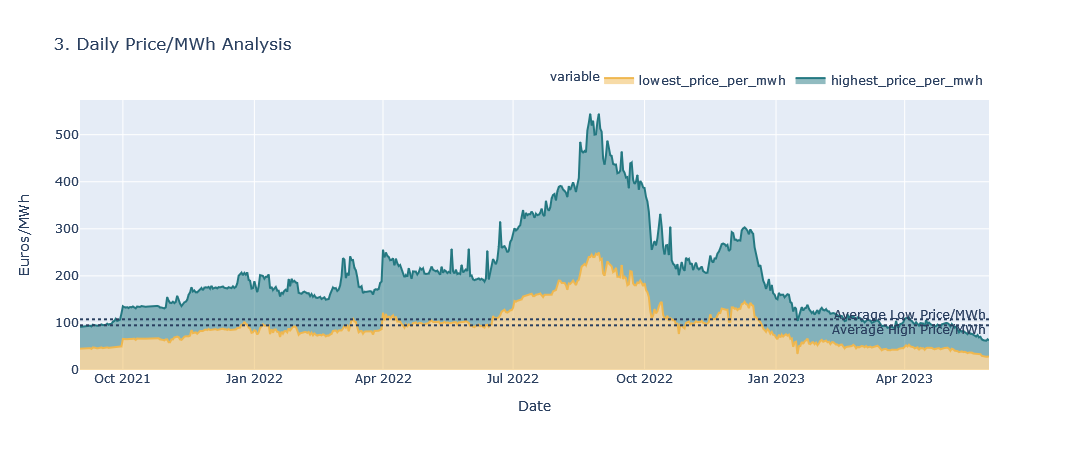

In [269]:
fig = px.area(daily, x=daily.index, y=["lowest_price_per_mwh","highest_price_per_mwh"],title='3. Daily Price/MWh Analysis',
              color_discrete_map={"lowest_price_per_mwh": "#EFB74F","highest_price_per_mwh": "#247881"})
fig.add_hline(y=meanGasLow, line_dash="dot", annotation_text="Average Low Price/MWh", annotation_position="top right")
fig.add_hline(y=meanGasHigh, line_dash="dot", annotation_text="Average High Price/MWh", annotation_position="bottom right")
fig.update_layout(xaxis_title="Date", yaxis_title="Euros/MWh",legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()

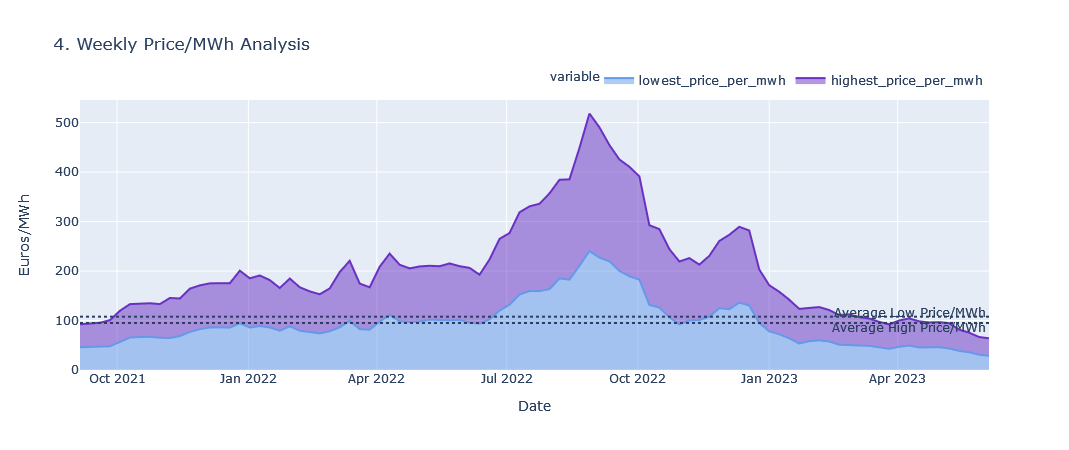

In [270]:
fig = px.area(weekly, x=weekly.index, y=["lowest_price_per_mwh","highest_price_per_mwh"],title='4. Weekly Price/MWh Analysis',
              color_discrete_map={"lowest_price_per_mwh": "#6499E9","highest_price_per_mwh": "#6930C3"})
fig.add_hline(y=meanGasLow, line_dash="dot", annotation_text="Average Low Price/MWh", annotation_position="top right")
fig.add_hline(y=meanGasHigh, line_dash="dot", annotation_text="Average High Price/MWh", annotation_position="bottom right")
fig.update_layout(xaxis_title="Date", yaxis_title="Euros/MWh",legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()

<div>
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 36px;">
    III. Historical Weather Analysis
    </h1>
</div>
<hr>

In [271]:
weather = pd.read_csv("/kaggle/input/predict-energy-behavior-of-prosumers/historical_weather.csv")
weather["datetime"] = pd.to_datetime(weather["datetime"])

monthly = weather.groupby(pd.Grouper(key="datetime", freq='M')).mean() 
weekly = weather.groupby(pd.Grouper(key="datetime", freq='W')).mean() 
daily = weather.groupby(pd.Grouper(key="datetime", freq='D')).mean() 
meanTemp = weather.temperature.mean()
meanSolar = weather.direct_solar_radiation.mean()

<div class="alert alert-block alert-info">
<h3 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color:#164863;  font-weight: bold; font-size: 24px;">   About 'historical_weather.csv':  </h3>
<b>datetime</b> <br>
<b>temperature</b> <br>
<b>dewpoint</b> <br>
<b>rain:</b> Different from the forecast conventions. The rain from large scale weather systems of the preceding hour in millimeters.<br>
<b>snowfall:</b>Different from the forecast conventions. Snowfall over the preceding hour in centimeters. <br>
<b>surface_pressure:</b> The air pressure at surface in hectopascals.<br>
<b>cloudcover_[low/mid/high/total]:</b> Different from the forecast conventions.<br>
<b>windspeed_10m:</b> The wind speed at 10 meters above ground in meters per second.<br>
<b>winddirection_10m:</b> The wind direction at 10 meters above ground in degrees.<br>
<b>shortwave_radiation:</b> The global horizontal irradiation in watt-hours per square meter.<br>
<b>direct_solar_radiation</b> <br>
<b>diffuse_radiation:</b> The diffuse solar irradiation in watt-hours per square meter.<br>
<b>[latitude/longitude]:</b> -The coordinates of the weather station.
</div>


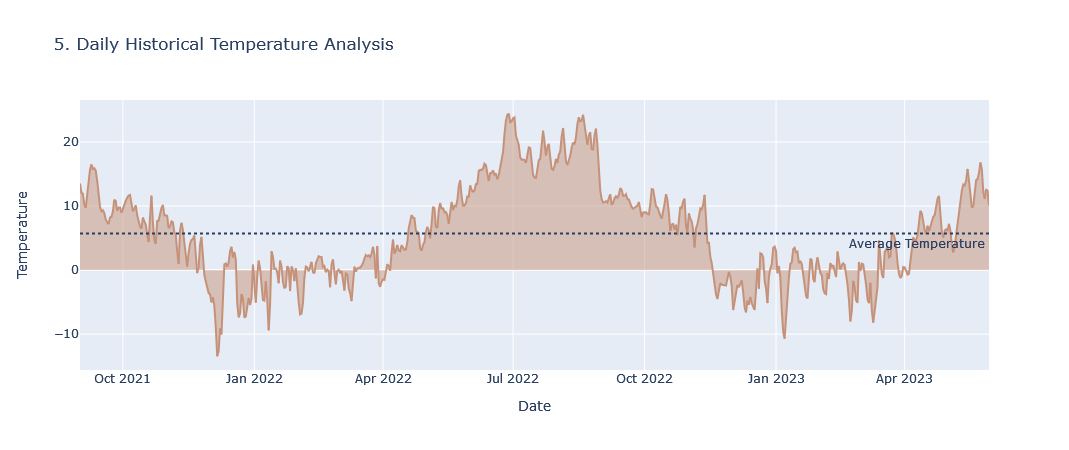

In [272]:
fig = px.area(daily, x=daily.index, y="temperature",title='5. Daily Historical Temperature Analysis')
fig.add_hline(y=meanTemp, line_dash="dot", annotation_text="Average Temperature", annotation_position="bottom right")
fig.update_traces(line_color='#C59279')
fig.update_layout(xaxis_title="Date", yaxis_title="Temperature",legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()

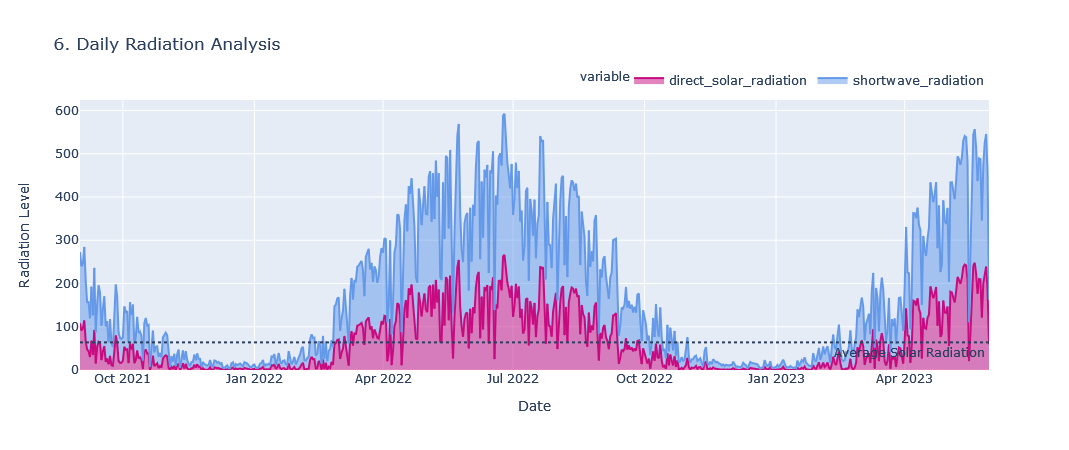

In [273]:
fig = px.area(daily, x=daily.index, y=["direct_solar_radiation","shortwave_radiation"],title='6. Daily Radiation Analysis',
              color_discrete_map={"shortwave_radiation": "#6499E9","direct_solar_radiation": "#C70A80"})
fig.add_hline(y=meanSolar, line_dash="dot", annotation_text="Average Solar Radiation", annotation_position="bottom right")
fig.update_layout(xaxis_title="Date", yaxis_title="Radiation Level",legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()

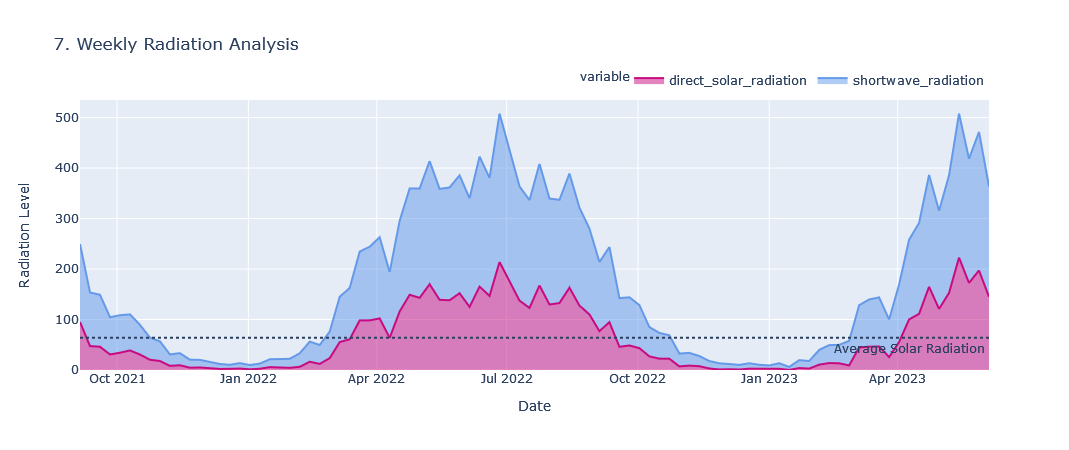

In [274]:
fig = px.area(weekly, x=weekly.index, y=["direct_solar_radiation","shortwave_radiation"],title='7. Weekly Radiation Analysis',
              color_discrete_map={"shortwave_radiation": "#6499E9","direct_solar_radiation": "#C70A80"})
fig.add_hline(y=meanSolar, line_dash="dot", annotation_text="Average Solar Radiation", annotation_position="bottom right")
fig.update_layout(xaxis_title="Date", yaxis_title="Radiation Level",legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()

<div id = "8" style="background-color: #F2E5E5; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h2 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 42px;">
        Conclusion</h2>
    <h3 style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: center; color: #555555; line-height: 1.6;">
    Many more plots to come. 😊<br><br>
    If you found the notebook helpful, please Upvote the Notebook. <br>
    If you have any suggestion regarding more plots to add, feel free to Comment & Tag me
    </h3>
</div>